 请选择至少两种不同的和 y 存在非线性关系的 X 进行实验

- 请实现逻辑回归中的 Kernel Regression 方法，见Cameron and Trivedi
(2005) 第 9.5。并实现 Monte Carlo 估计 == 生成随机样本，看模型估计效果

- 请回答:

    - 不同的 bandwidth 对于问题的影响有多大
    - 当 X 之间的相关性增加时，估计量效果如何?

![](https://i.imgur.com/I5i4YSj.png)

In [ ]:
import numpy as np
import scipy.stats

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn") 
plt.rcParams['figure.dpi'] = 100 

In [ ]:
def K_epanechnikov(z):
    """Epanechnikov kernel"""
    return 0.75 * (1 - z**2) * (np.abs(z) < 1)  

def K_gaussian(z):
    return (2 * np.pi) ** (-0.5) * np.exp(-1. * z**2 / 2)

In [ ]:
K_epanechnikov_vec = np.vectorize(K_epanechnikov)
K_gaussian_vec = np.vectorize(K_gaussian)

![](https://i.imgur.com/If9sl7n.png)

![](https://i.imgur.com/AT5TmgS.png)

In [ ]:
# product kernel
class KernelRegression:
    def __init__(self, x, y, k):
        self.x = x
        self.y = y        
        self.k = k

    def pred_single(self, x_0, h):
        weights = self.k((self.x - x_0) / h)
        denom = np.sum(weights)
        numer = np.sum(weights * self.y)
        return numer / denom        

    def pred_bunch(self, X, h):
        data = self.x.copy()
        truth = self.y.copy()
        truth = truth[None, :]
            
        out = data[None, ...] - X[:, None, ...]
        out = out / h
        weights = self.k(out)
        if len(X.shape) > 1:
            weights = np.prod(weights, axis=-1)
            
        denom = np.sum(weights, axis=1)

        numer = weights @ truth.T
        numer = numer.squeeze(-1)
        preds = numer / (denom + 1e-07)

        return preds

https://pythonhosted.org/PyQt-Fit/NonParam_tut.html

In [ ]:
def f1(x):
    return 3*np.cos(x/2) + x + 3
xs = np.random.rand(200) * 10
ys = f1(xs) + 2*np.random.randn(*xs.shape)

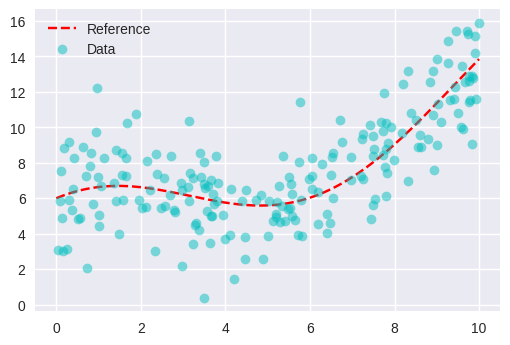

In [ ]:
grid = np.r_[0:10:512j]
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(grid, f1(grid), 'r--', label='Reference')
plt.plot(xs, ys, 'co', alpha=0.5, label='Data')
plt.legend(loc='best')

## Bandwidth

In [ ]:
kreg = KernelRegression(xs, ys, K_gaussian_vec)

In [ ]:
preds1 = kreg.pred_bunch(grid, 0.1)
preds2 = kreg.pred_bunch(grid, 0.5)
preds3 = kreg.pred_bunch(grid, 1.)
preds4 = kreg.pred_bunch(grid, 5.)

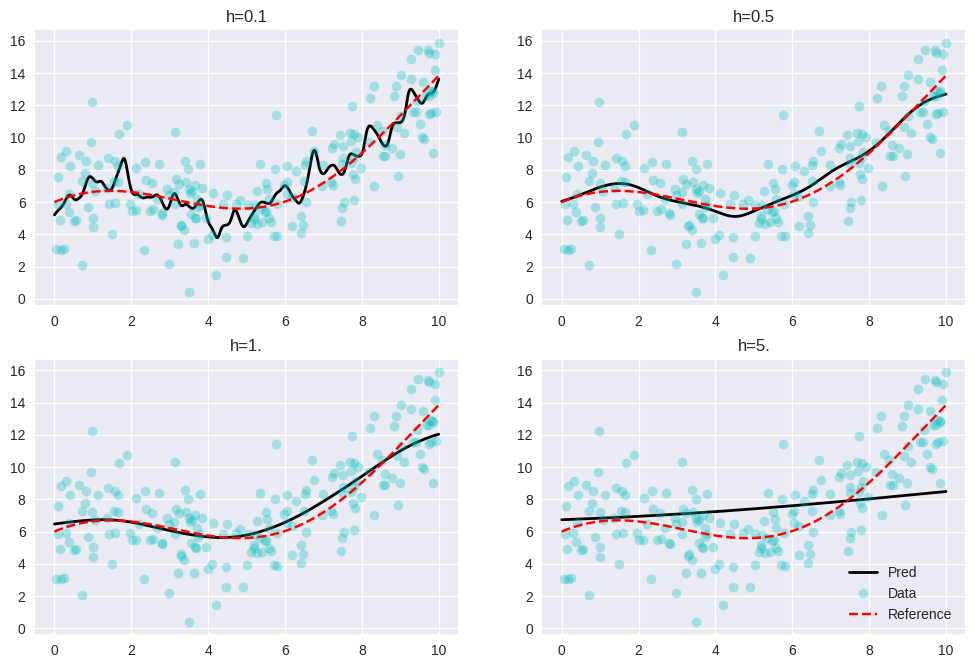

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(grid, preds1, 'k', linewidth=2)
axs[0, 0].plot(xs, ys, 'co', alpha=0.3, label='Data')
axs[0, 0].plot(grid, f1(grid), 'r--', label='Reference')
axs[0, 0].set_title('h=0.1')
axs[0, 1].plot(grid, preds2, 'k', linewidth=2)
axs[0, 1].plot(xs, ys, 'co', alpha=0.3, label='Data')
axs[0, 1].plot(grid, f1(grid), 'r--', label='Reference')
axs[0, 1].set_title('h=0.5')
axs[1, 0].plot(grid, preds3, 'k', linewidth=2)
axs[1, 0].plot(xs, ys, 'co', alpha=0.3, label='Data')
axs[1, 0].plot(grid, f1(grid), 'r--', label='Reference')
axs[1, 0].set_title('h=1.')
axs[1, 1].plot(grid, preds4,'k', linewidth=2, label='Pred')
axs[1, 1].plot(xs, ys, 'co', alpha=0.3, label='Data')
axs[1, 1].plot(grid, f1(grid), 'r--', label='Reference')
axs[1, 1].set_title('h=5.')
plt.legend(loc='lower right')
# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [ ]:
def f2(x):    
    return np.log(x**3+1e-05) + np.sin(x**1.5)
xs = np.random.rand(200) * 10
ys = f2(xs) + np.random.randn(*xs.shape)*1.5

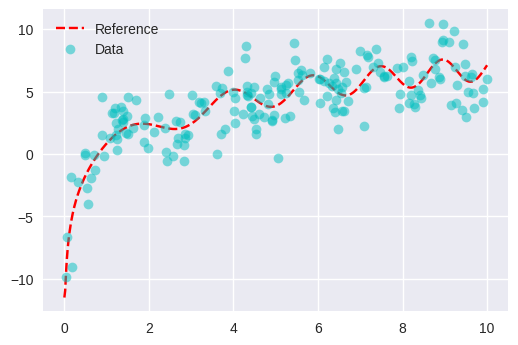

In [ ]:
plt.rcParams['figure.figsize'] = [6, 4]
grid = np.r_[0:10:512j]
plt.plot(grid, f2(grid), 'r--', label='Reference')
plt.plot(xs, ys, 'co', alpha=0.5, label='Data')
plt.legend(loc='best')

In [ ]:
kreg = KernelRegression(xs, ys, K_gaussian_vec)

In [ ]:
preds1 = kreg.pred_bunch(grid, 0.1)
preds2 = kreg.pred_bunch(grid, 0.5)
preds3 = kreg.pred_bunch(grid, 1.)
preds4 = kreg.pred_bunch(grid, 5.)

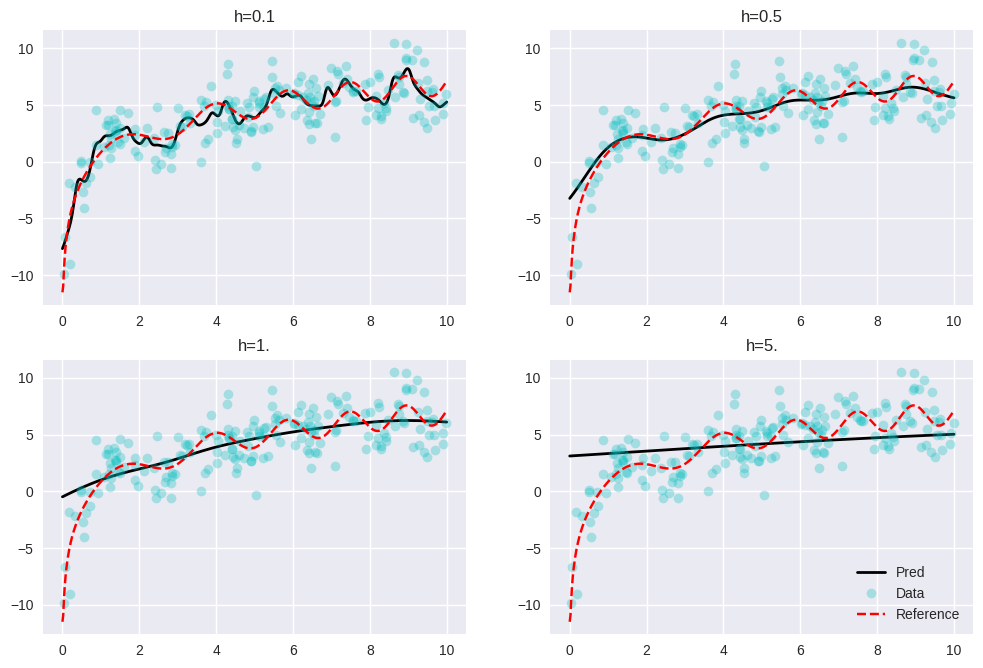

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(grid, preds1, 'k', linewidth=2)
axs[0, 0].plot(xs, ys, 'co', alpha=0.3, label='Data')
axs[0, 0].plot(grid, f2(grid), 'r--', label='Reference')
axs[0, 0].set_title('h=0.1')
axs[0, 1].plot(grid, preds2, 'k', linewidth=2)
axs[0, 1].plot(xs, ys, 'co', alpha=0.3, label='Data')
axs[0, 1].plot(grid, f2(grid), 'r--', label='Reference')
axs[0, 1].set_title('h=0.5')
axs[1, 0].plot(grid, preds3, 'k', linewidth=2)
axs[1, 0].plot(xs, ys, 'co', alpha=0.3, label='Data')
axs[1, 0].plot(grid, f2(grid), 'r--', label='Reference')
axs[1, 0].set_title('h=1.')
axs[1, 1].plot(grid, preds4, 'k', linewidth=2, label='Pred')
axs[1, 1].plot(xs, ys, 'co', alpha=0.3, label='Data')
axs[1, 1].plot(grid, f2(grid), 'r--', label='Reference')
axs[1, 1].set_title('h=5.')
plt.legend(loc='lower right')

## Correlated Variables

In [ ]:
def f(x1, x2):
    return 3*np.cos(x1/2) + x2**2/5 + 3
x1s = np.random.rand(200) * 10
x2s = x1s * 0.3 # x2 simply scales x1.
ys = f(x1s, x2s) + 2*np.random.randn(*xs.shape)

In [ ]:
xs = np.column_stack((x1s, x2s))

In [ ]:
kreg = KernelRegression(xs, ys, K_gaussian_vec)

In [ ]:
grid2 = grid * 0.3
grids = np.column_stack((grid, grid2))

In [ ]:
pred = kreg.pred_bunch(grids, np.array([1, 1])) 

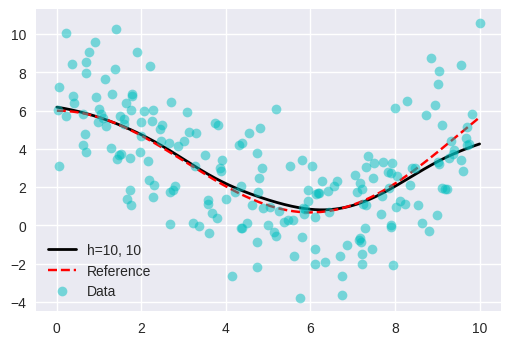

In [ ]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(grid, pred, 'k', label="h=10, 10", linewidth=2)
plt.plot(grid, f(grid, grid2), 'r--', label='Reference')
plt.plot(x1s, ys, 'co', alpha=0.5, label='Data')
plt.legend(loc='best')

In [ ]:
pred = kreg.pred_bunch(grids, np.array([10, 10])) # Both of the bandwidth are too wide.

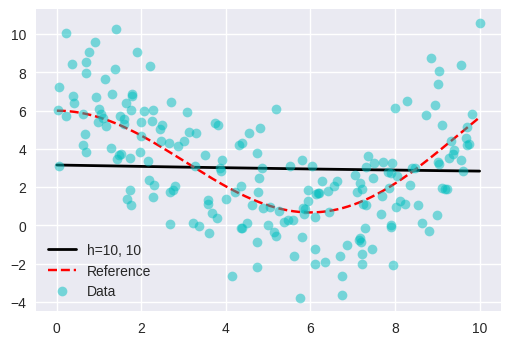

In [ ]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(grid, pred, 'k', label="h=10, 10", linewidth=2)
plt.plot(grid, f(grid, grid2), 'r--', label='Reference')
plt.plot(x1s, ys, 'co', alpha=0.5, label='Data')
plt.legend(loc='best')

In [ ]:
pred = kreg.pred_bunch(grids, np.array([0.1, 0.1])) # Both of the bandwidth are too narrow.

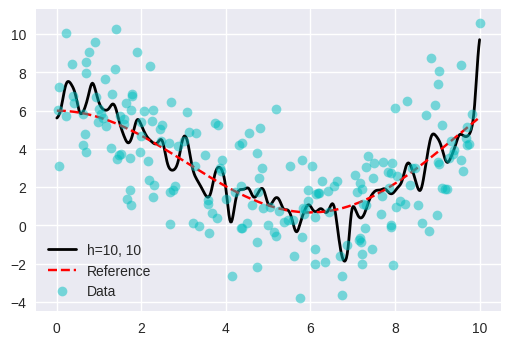

In [ ]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(grid, pred, 'k', label="h=10, 10", linewidth=2)
plt.plot(grid, f(grid, grid2), 'r--', label='Reference')
plt.plot(x1s, ys, 'co', alpha=0.5, label='Data')
plt.legend(loc='best')

In [ ]:
pred = kreg.pred_bunch(grids, np.array([10, 0.1])) # Both of the bandwidth are not reasonable, but combining together it seems fine.

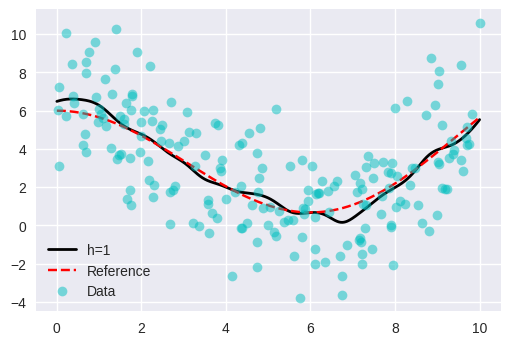

In [ ]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(grid, pred, 'k', label="h=1", linewidth=2)
plt.plot(grid, f(grid, grid2), 'r--', label='Reference')
plt.plot(x1s, ys, 'co', alpha=0.5, label='Data')
plt.legend(loc='best')